In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df_iris = pd.read_csv('/content/drive/MyDrive/Iris.csv')
X = df_iris.iloc[:, :-1]
y = df_iris.iloc[:, -1]
print("Feature names:", X.columns.tolist() if isinstance(X, pd.DataFrame) else "Not available from CSV")
print("Target names:", y.unique().tolist() if isinstance(y, pd.Series) else "Not available from CSV")

Feature names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target names: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [5]:
df = pd.DataFrame(X, columns=X.columns)
df['species'] = y
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)
print(y_train)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22    23            4.6           3.6            1.0           0.2
15    16            5.7           4.4            1.5           0.4
65    66            6.7           3.1            4.4           1.4
11    12            4.8           3.4            1.6           0.2
42    43            4.4           3.2            1.3           0.2
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[120 rows x 5 columns]
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iri

In [11]:
svm_model = SVC(kernel='linear')   # linear kernel (easy to understand)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [13]:
y_pred = svm_model.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [24]:
new_flower = [[0, 5.1, 3.5, 1.4, 0.2]]  # Added a placeholder 'Id' as the first element
prediction = svm_model.predict(new_flower)

# prediction[0] already contains the predicted species name
print("Predicted Species:", prediction[0])

Predicted Species: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


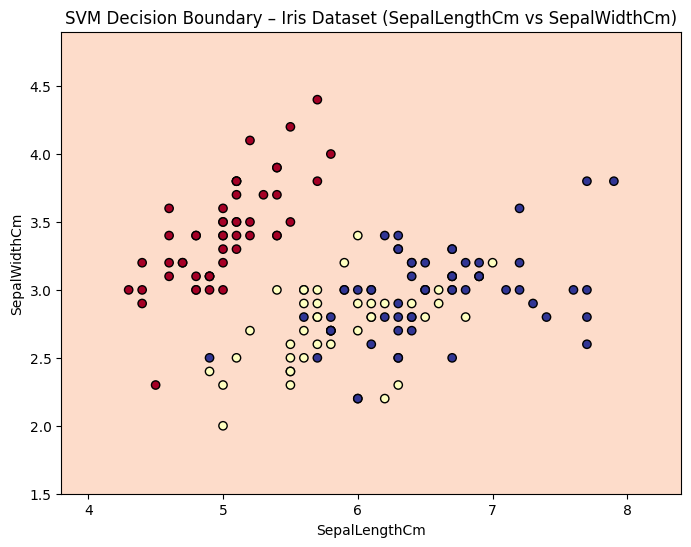

In [23]:
from sklearn.preprocessing import LabelEncoder

# Select two features for plotting the decision boundary. Let's use SepalLengthCm and SepalWidthCm.
feature1_name = 'SepalLengthCm'
feature2_name = 'SepalWidthCm'

feature1_idx = X.columns.get_loc(feature1_name)
feature2_idx = X.columns.get_loc(feature2_name)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X.iloc[:, feature1_idx].min() - 0.5, X.iloc[:, feature1_idx].max() + 0.5
y_min, y_max = X.iloc[:, feature2_idx].min() - 0.5, X.iloc[:, feature2_idx].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
other_feature_indices = [idx for idx in range(X.shape[1]) if idx not in [feature1_idx, feature2_idx]]
mean_other_features = X_train.iloc[:, other_feature_indices].mean().values
input_features = np.zeros((xx.ravel().shape[0], X.shape[1]))
input_features[:, feature1_idx] = xx.ravel()
input_features[:, feature2_idx] = yy.ravel()
for i, other_idx in enumerate(other_feature_indices):
    input_features[:, other_idx] = mean_other_features[i]
Z_pred_labels = svm_model.predict(input_features)

# Encode string labels to numerical values for plotting
le = LabelEncoder()
le.fit(y_train) # Fit encoder on training target labels

Z_numeric = le.transform(Z_pred_labels)
Z_numeric = Z_numeric.reshape(xx.shape)
y_numeric = le.transform(y) # Encode the actual labels for scatter plot

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=plt.cm.RdYlBu)

# Plot the actual data points
plt.scatter(X.iloc[:, feature1_idx], X.iloc[:, feature2_idx], c=y_numeric, edgecolors='k', cmap=plt.cm.RdYlBu)

plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title(f"SVM Decision Boundary – Iris Dataset ({feature1_name} vs {feature2_name})")
plt.show()